In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

In [2]:
df = pd.read_csv("/Users/gim-yuseong/Desktop/PycharmProjects/2024_3_2/2024_3_2_딥러닝응용/diabetes.csv") # \는 콜백문자 때문에 \\로 사용한다.
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [4]:
# 결측치 확인
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
# 결측치 확인
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Train Test Split (feat. PCA)

In [6]:
X=df.drop('Age', axis=1)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Outcome
0,6,148,72,35,0,33.6,0.627,1
1,1,85,66,29,0,26.6,0.351,0
2,8,183,64,0,0,23.3,0.672,1
3,1,89,66,23,94,28.1,0.167,0
4,0,137,40,35,168,43.1,2.288,1


In [7]:
y=df['Age']
y.value_counts()

Age
22    72
21    63
25    48
24    46
23    38
28    35
26    33
27    32
29    29
31    24
41    22
30    21
37    19
42    18
33    17
38    16
36    16
32    16
45    15
34    14
46    13
43    13
40    13
39    12
35    10
50     8
51     8
52     8
44     8
58     7
47     6
54     6
49     5
48     5
57     5
53     5
60     5
66     4
63     4
62     4
55     4
67     3
56     3
59     3
65     3
69     2
61     2
72     1
81     1
64     1
70     1
68     1
Name: count, dtype: int64

In [8]:
#one hot encoding 하기

y = pd.get_dummies(y).values
y

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False,  True, ..., False, False, False]])

Explained variance ratio:  [0.89671128 0.06110372 0.02573723 0.01265819]
원래 데이터의 차원:  (768, 8)
차원 축소 후 데이터의 차원:  (768, 4)


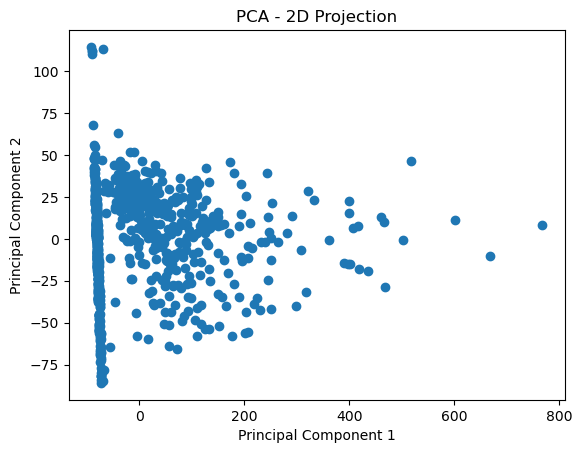

In [9]:
# 필요한 라이브러리 불러오기
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# PCA 객체 생성 (예: 4개의 주성분으로 차원 축소)
pca = PCA(n_components=4)
#pca = PCA(n_components=2)

# PCA 학습 및 변환
X_reduced = pca.fit_transform(X)

print("Explained variance ratio: ", pca.explained_variance_ratio_)

# 5. 결과 확인
print("원래 데이터의 차원: ", X.shape)  
print("차원 축소 후 데이터의 차원: ", X_reduced.shape) 

# 차원 축소된 데이터 시각화
plt.scatter(X_reduced[:, 0], X_reduced[:, 1])
plt.title('PCA - 2D Projection')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.25, random_state=20)
# random_state는 데이터를 무작위로 나누거나 섞을 때 사용되는 난수 발생기의 시드(seed) 값
X_train

array([[-89.75879896, 112.14065981, -22.71472971,  15.15140214],
       [-82.73835715,   8.6292136 ,  72.36541425,   2.71053233],
       [-73.92285031, -48.90004469, -10.97895213,  23.6397792 ],
       ...,
       [-24.40709768,  12.35178232,   1.76104068,  12.0246541 ],
       [-81.29847143,  -1.23795226,   8.97824522, -13.34384615],
       [-75.91030713, -54.76952567,  -7.64177884, -16.98301422]])

In [11]:
y_train

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [ True, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

## Make a Model

In [17]:
#Defining the model 
#분류 예제

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

model = Sequential()

model.add(Dense(15, input_shape=(X_train.shape[0], ), activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

model.compile(optimizer=Adam(learning_rate=0.02), loss='bce', metrics=['accuracy'])

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 15)             │         8,655 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 6)              │            66 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 2)              │            14 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,895 (34.75 KB)

 Trainable params: 8,895 (34.75 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
# 모델 학습
model_history = model.fit(x=X_train, y=y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test, axis=1) # 배열에서 최댓값을 가지는 원소의 인덱스를 반환하는 함수
y_pred_class = np.argmax(y_pred, axis=1)


Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1514 - loss: 2.8936 - val_accuracy: 0.0625 - val_loss: 8.1573
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2020 - loss: 2.8811 - val_accuracy: 0.0521 - val_loss: 8.2011
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1626 - loss: 2.9556 - val_accuracy: 0.0625 - val_loss: 8.1886
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1960 - loss: 2.9344 - val_accuracy: 0.0729 - val_loss: 8.1949
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1796 - loss: 2.8381 - val_accuracy: 0.0521 - val_loss: 8.2332
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1888 - loss: 2.8758 - val_accuracy: 0.0573 - val_loss: 8.3081
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1723 - loss: 2.8855 - val_accuracy: 0.0365 - val_loss: 8.3337
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2085 - loss: 2.7855 - val_accuracy: 0.0573 - val_loss:

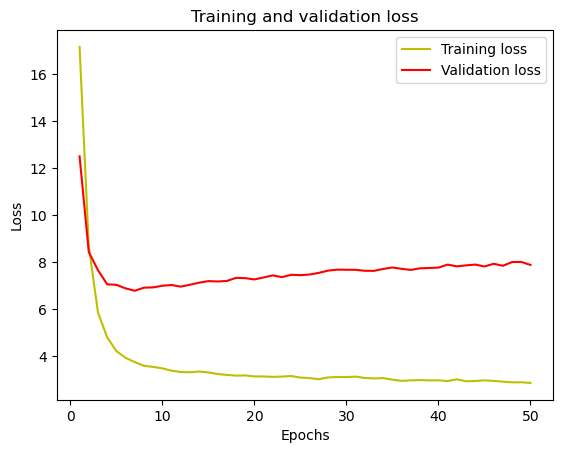

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix

# 훈련 손실(training loss)과 검증 손실(validation loss) 추출
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

# 에포크(epoch) 범위 생성
epochs = range(1, len(loss) + 1)

# 훈련 손실(training loss)과 검증 손실(validation loss) 시각화
plt.plot(epochs, loss, 'y', label='Training loss')  # 훈련 손실을 노란색(yellow)으로 플롯
plt.plot(epochs, val_loss, 'r', label='Validation loss')  # 검증 손실을 빨간색(red)으로 플롯
plt.title('Training and validation loss')  # 그래프 제목 설정
plt.xlabel('Epochs')  # x축 레이블 설정
plt.ylabel('Loss')  # y축 레이블 설정
plt.legend()  # 범례(legend) 표시
plt.show()  # 그래프 출력

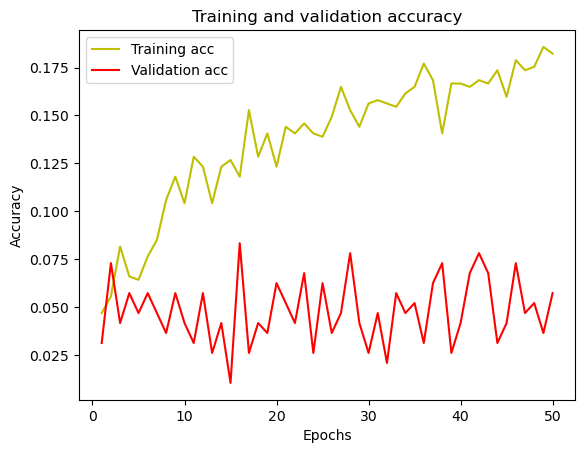

In [22]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [25]:
print("\n----------------classification_report-----------------")
print(classification_report(y_test_class, y_pred_class))
print("\n------------------confusion_matrix--------------------")
print(confusion_matrix(y_test_class, y_pred_class))


----------------classification_report-----------------
              precision    recall  f1-score   support

           0       0.03      0.06      0.04        18
           1       0.18      0.44      0.26        18
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00        10
           4       0.00      0.00      0.00        13
           5       0.10      0.14      0.12         7
           6       0.14      0.10      0.12        10
           7       0.00      0.00      0.00         7
           8       0.00      0.00      0.00         8
           9       0.00      0.00      0.00         2
          10       0.12      0.17      0.14         6
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         4
          13       0.00      0.00      0.00         2
          14       0.00      0.00      0.00         5
          15       0.00      0.00      0.00         5
          16       0.00  

/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/